In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_original =  pd.read_csv("../datos/competencia_03.csv.gz")

In [4]:
#ipc_arg =  pd.read_excel("../datos/ipc_arg.xlsx")

In [ ]:
#inflacao acumulada = ipc_nivel_general_nacional - ipc_nivel_general_nacional.shift(1)
#ipc_arg['inflacion_acumulada'] =  ipc_arg['ipc_nivel_general_nacional'].shift(1) - ipc_arg['ipc_nivel_general_nacional']
#ipc_arg['indice_tiempo'] = ipc_arg['indice_tiempo'].dt.strftime('%Y%m').astype(int)
#ipc_arg.rename(columns={'indice_tiempo':'foto_mes'}, inplace=True)
#ipc_arg


In [8]:
#data_teste = dataset_original.head(5)

In [ ]:
#data_teste

In [59]:
# Mesclando o dataframe original com o dataframe ipc_arg com base na coluna 'ano_mes'
#merged_df = pd.merge(dataset_original, ipc_arg[['inflacion_acumulada', 'foto_mes']], how='left', on='foto_mes')

# Calculando 'mcomisiones_atualizado' com base na inflação acumulada
#merged_df['mcomisiones_atualizado'] = merged_df['mcomisiones'] * (1 + merged_df['inflacion_acumulada'])

# Dropando a coluna 'ano_mes' se você não precisar dela mais
#merged_df = merged_df.drop('foto_mes', axis=1)
#merged_df

In [47]:
dataset = dataset_original[(dataset_original['foto_mes'] >= 202012) & (dataset_original['foto_mes'] <= 202106)]

In [48]:
dataset.set_index('foto_mes', inplace=True)

In [67]:
df_roto_zero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null.columns[df_roto_zero_null.eq(100).any()]].stack().reset_index()
df_roto_zero_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [63]:
df_roto_zero = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero = df_roto_zero[df_roto_zero.columns[df_roto_zero.eq(100).any()]].stack().reset_index()
df_roto_zero.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero = df_roto_zero[df_roto_zero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [68]:
df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
df_roto_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

C:\Users\maico\AppData\Local\Temp\ipykernel_94044\2256541971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')


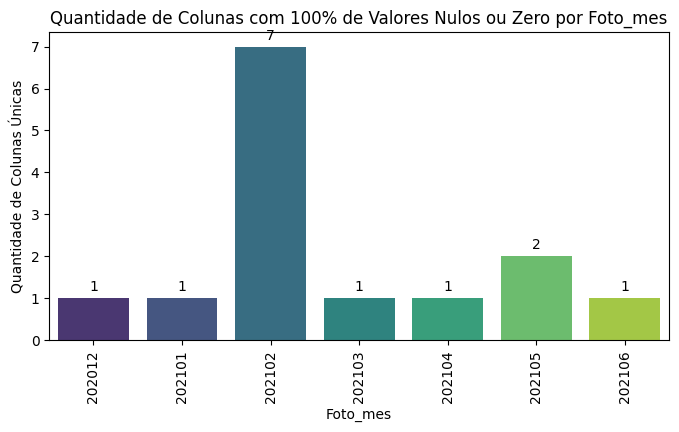

In [111]:
count_df_roto_zero_null = df_roto_zero_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Nulos ou Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_94044\3315999687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')


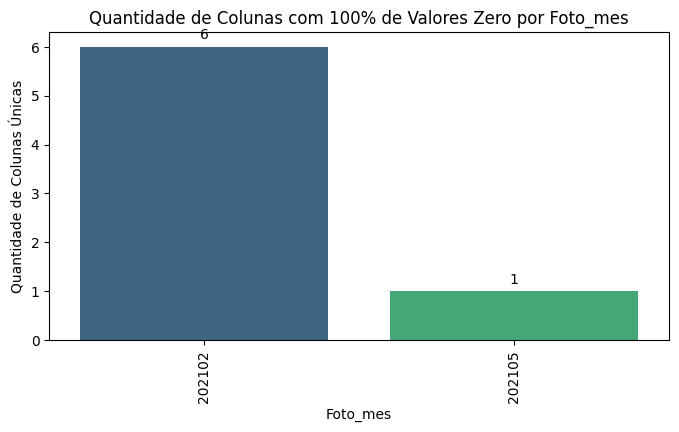

In [53]:
count_df_roto_zero = df_roto_zero.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

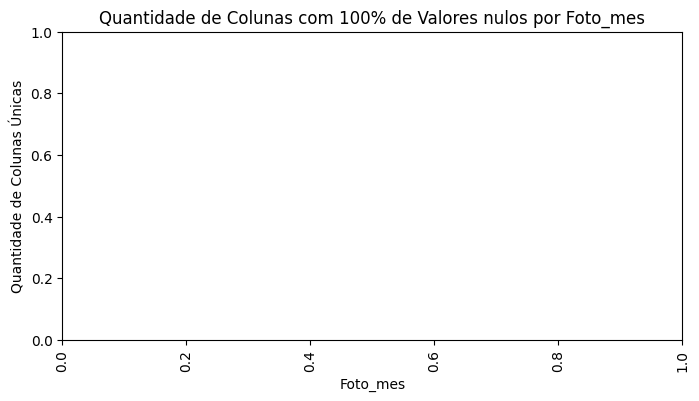

In [69]:
count_df_roto_null = df_roto_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [55]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

merged_df = pd.merge(count_df_roto_zero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_zero', '_null'))
merged_df = merged_df.fillna(0)
merged_df['quantidade_colunas'] =  merged_df['quantidade_colunas_zero'] - merged_df['quantidade_colunas_null']


C:\Users\maico\AppData\Local\Temp\ipykernel_94044\2532655015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')


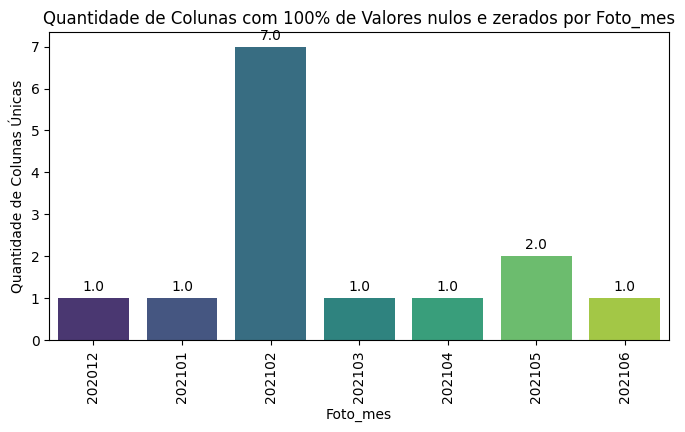

In [56]:

plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos e zerados por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(merged_df['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [115]:
df_parcial_zero = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_parcial_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)

In [116]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)
filtered_columns

numero_de_cliente          False
active_quarter             False
cliente_vip                False
internet                   False
cliente_edad               False
                           ...  
Visa_mconsumototal         False
Visa_cconsumos             False
Visa_cadelantosefectivo    False
Visa_mpagominimo           False
clase_ternaria             False
Length: 154, dtype: bool

In [117]:
df_parcial_zero_filtered = df_parcial_zero.loc[:, filtered_columns]
df_parcial_null_filtered = df_parcial_null.loc[:, filtered_columns]

In [118]:
df_parcial_zero_filtered

,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccajas_depositos,Master_madelantodolares,Visa_madelantodolares
foto_mes,,,,,,,,,
202012,94.42,96.23,93.48,93.73,96.11,96.60,96.55,39.09,86.22
202101,92.97,94.53,91.42,91.91,94.55,95.14,96.51,39.34,86.28
202102,100.00,100.00,100.00,100.00,100.00,100.00,96.61,40.20,86.60
202103,94.51,96.52,92.68,93.07,95.42,96.00,95.97,40.41,86.62
202104,97.71,97.72,94.29,94.55,95.41,95.86,98.69,40.49,86.80
202105,97.65,97.67,94.13,94.41,95.70,96.12,100.00,41.03,86.90
202106,96.69,96.71,93.67,93.89,95.60,96.01,99.48,41.85,87.15


In [119]:
df_parcial_null_filtered

,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccajas_depositos,Master_madelantodolares,Visa_madelantodolares
foto_mes,,,,,,,,,
202012,0.0,0.0,0.0,1.36,0.0,2.34,0.0,60.91,13.77
202101,0.0,0.0,0.0,2.41,0.0,2.33,0.0,60.65,13.71
202102,0.0,0.0,0.0,0.00,0.0,0.00,0.0,59.80,13.38
202103,0.0,0.0,0.0,2.21,0.0,3.00,0.0,59.59,13.37
202104,0.0,0.0,0.0,1.71,0.0,3.25,0.0,59.51,13.19
202105,0.0,0.0,0.0,2.27,0.0,2.95,0.0,58.97,13.10
202106,0.0,0.0,0.0,1.81,0.0,2.56,0.0,58.15,12.84


In [120]:
bool_index = df_parcial_zero_filtered.index.isin(df_parcial_null_filtered.index)


In [122]:
bool_index

array([ True,  True,  True,  True,  True,  True,  True])

In [130]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)


In [147]:
filtered_columns_true = filtered_columns[filtered_columns == True].index

In [148]:
filtered_columns_true

Index(['ccajeros_propios_descuentos', 'mcajeros_propios_descuentos',
       'ctarjeta_visa_descuentos', 'mtarjeta_visa_descuentos',
       'ctarjeta_master_descuentos', 'mtarjeta_master_descuentos',
       'ccajas_depositos', 'Master_madelantodolares', 'Visa_madelantodolares'],
      dtype='object')

In [151]:
df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')

,foto_mes,level_1,quantidade_zero
0,202012,ccajeros_propios_descuentos,94.42
1,202012,mcajeros_propios_descuentos,96.23
2,202012,ctarjeta_visa_descuentos,93.48
3,202012,mtarjeta_visa_descuentos,93.73
4,202012,ctarjeta_master_descuentos,96.11
...,...,...,...
58,202106,ctarjeta_master_descuentos,95.60
59,202106,mtarjeta_master_descuentos,96.01
60,202106,ccajas_depositos,99.48
61,202106,Master_madelantodolares,41.85


In [152]:
df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

,foto_mes,level_1,quantidade_null
0,202012,ccajeros_propios_descuentos,0.00
1,202012,mcajeros_propios_descuentos,0.00
2,202012,ctarjeta_visa_descuentos,0.00
3,202012,mtarjeta_visa_descuentos,1.36
4,202012,ctarjeta_master_descuentos,0.00
...,...,...,...
58,202106,ctarjeta_master_descuentos,0.00
59,202106,mtarjeta_master_descuentos,2.56
60,202106,ccajas_depositos,0.00
61,202106,Master_madelantodolares,58.15


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha df_parcial_zero e df_parcial_null disponíveis

# Filtrar colunas onde a soma das porcentagens de valores zero e nulos é igual a 100
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)

# Selecionar apenas as colunas relevantes
df_parcial_zero_filtered = df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')
df_parcial_null_filtered = df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

# Mesclar os dois dataframes
df_merged = pd.merge(df_parcial_zero_filtered, df_parcial_null_filtered, on=['foto_mes', 'level_1'])
df_merged = df_merged[(df_merged['quantidade_zero'] + df_merged['quantidade_null']) == 100]


In [171]:
df_merged

,foto_mes,level_1,quantidade_zero,quantidade_null
7,202012,Master_madelantodolares,39.09,60.91
18,202102,ccajeros_propios_descuentos,100.00,0.00
19,202102,mcajeros_propios_descuentos,100.00,0.00
20,202102,ctarjeta_visa_descuentos,100.00,0.00
21,202102,mtarjeta_visa_descuentos,100.00,0.00
22,202102,ctarjeta_master_descuentos,100.00,0.00
23,202102,mtarjeta_master_descuentos,100.00,0.00
25,202102,Master_madelantodolares,40.20,59.80
34,202103,Master_madelantodolares,40.41,59.59
43,202104,Master_madelantodolares,40.49,59.51


In [174]:
colunas_imputar = df_merged['level_1'].unique()

In [177]:
dataset[colunas_imputar].fillna(0)

,Master_madelantodolares,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccajas_depositos,Visa_madelantodolares
foto_mes,,,,,,,,,
202103,0.0,0,0.0,0,0.0,0,0.0,0,0.0
202103,0.0,0,0.0,0,0.0,0,0.0,0,0.0
202103,0.0,0,0.0,0,0.0,0,0.0,0,0.0
202103,0.0,0,0.0,0,0.0,0,0.0,0,0.0
202103,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
202102,0.0,0,0.0,0,0.0,0,0.0,0,0.0
202102,0.0,0,0.0,0,0.0,0,0.0,0,0.0
202102,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [179]:
dataset_original[colunas_imputar].describe()